In [50]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [51]:
filenames = ['Data_Air_to_Glass_Labday_2.txt', 'Data_Intensity_no_polirization_Labday_2.txt']

Data_angles = np.loadtxt(filenames[0])

theta1 = Data_angles[:, 0]
thetam = Data_angles[:, 1]

# Convert into radians
theta1 = theta1 * np.pi/180
thetam = thetam * np.pi/180

# Calculate real angle
theta2 = theta1 - thetam

In [52]:
# Uncertainties if we use the ophobningslov
# theta1_err = abs(np.cos(theta1) * 0.5 * np.pi/180)
# theta2_err = abs(np.cos(theta2) * 0.5 * np.pi/180)

# Uncertainty bruteforce
theta1_err = abs(np.sin(0.5 * np.pi/180))
theta2_err = abs(np.sin(0.5 * np.pi/180))

The index of refraction for the glass is 1.5269 plusminus 0.007


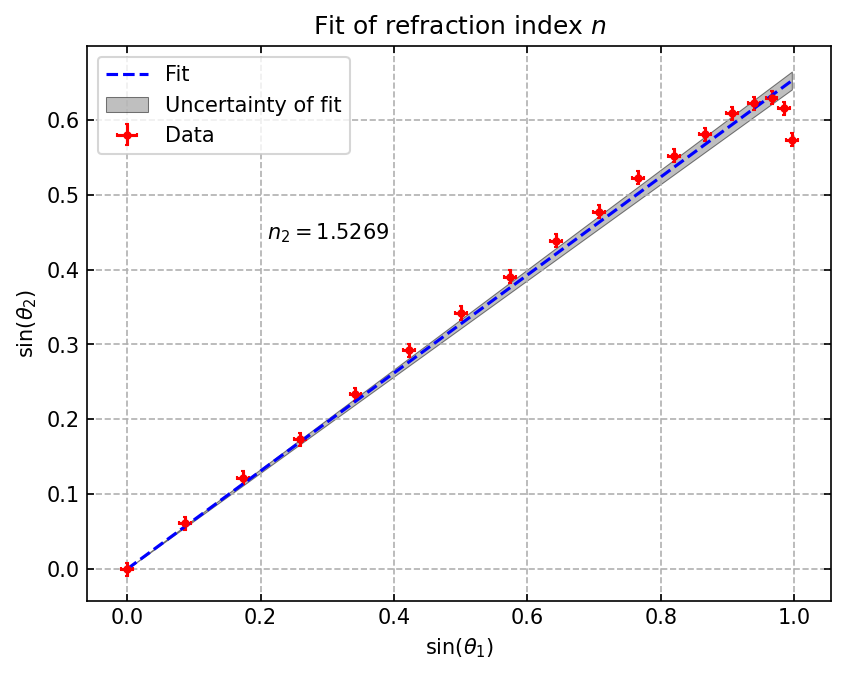

In [53]:
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1), np.sin(theta2), sigma = theta2_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1), np.sin(theta2), xerr = theta1_err, yerr = theta2_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))


## Analysis of intensity

In [54]:
# Defining all the functions for the intensity
def reflected_p(X, a):
    angle1, angle2 = X
    return a * np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(X, a):
    angle1, angle2 = X
    return a * np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(X, a):
    angle1, angle2 = X
    return a * np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(X, a):
    angle1, angle2 = X
    return a * np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

p_functions = [reflected_p, transmitted_p]
s_functions = [reflected_s, transmitted_s]



In [63]:
Data_volts = np.loadtxt(filenames[1], skiprows = 2)

theta1_v = Data_volts[:,0] * np.pi/180
thetam_v = Data_volts[:,1] * np.pi/180
Volts = Data_volts[:,2]
Volts_err = Data_volts[:, 3] * 1e-2

theta2_v = theta1_v - thetam_v

In [70]:
Volts

array([2.42 , 2.45 , 2.56 , 2.61 , 2.8  , 2.24 , 2.2  , 2.07 , 1.7  ,
       1.45 , 1.2  , 0.94 , 0.666, 0.4  , 0.154, 0.008])

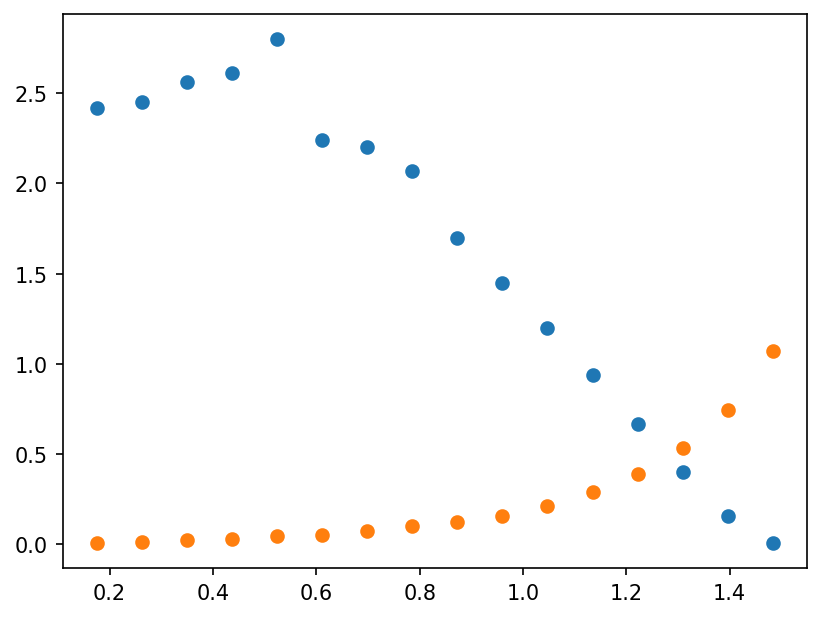

In [77]:
plt.plot(theta1_v, Volts, 'o')

p_opt, p_cov = sp.curve_fit(reflected_s, (theta1_v, theta2_v), Volts)
plt.plot(theta1_v, reflected_s((theta1_v, theta2_v), p_opt[0]), 'o')



In [80]:
E_prime = 2.2
E_zero = 3.4

r = E_prime/E_zero
r**2

0.41868512110726647